# [Linear regression](https://developers.google.com/machine-learning/crash-course/linear-regression)

### 🎓 Learning objectives:

- Explain a loss function and how it works.
- Define and describe how gradient descent finds the optimal model parameters.
- Describe how to tune hyperparameters to efficiently train a linear model.

## Linear regression

**Linear regression** is a type of machine learning model in which the model is a linear model and the prediction is a floating-point value. (This is the regression part of *linear regression*). It's a statistical technique used to find the relationship between variables. In a machine learning (ML) context, it finds the relationship between **features**, which is an input variable to a machine learning model, and a **label**, which is, in supervised machine learning, the "answer" or "result" portion of an example.

---

Consider this example: suppose we want to predict a car's fuel efficiency in miles per gallon based on how heavy the car is, and we have the following dataset:

| Pounds in 1000s (feature) | Miles per gallone (label) |
|---------------------------|---------------------------|
| 3.5                       | 18                        |
| 3.69                      | 15                        |
| 3.44                      | 18                        |
| 3.43                      | 16                        |
| 4.34                      | 15                        |
| 4.42                      | 14                        |
| 2.37                      | 24                        |

Let's plot it into a `matplotlib` graph:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

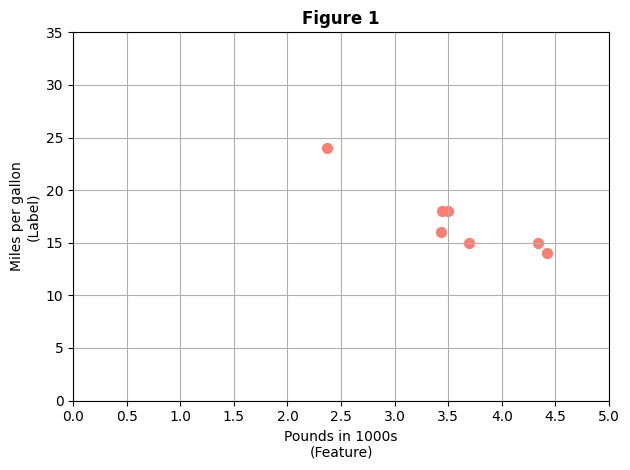

In [7]:
feature = [3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37]
label = [18, 15, 18, 16, 15, 14, 24]

plt.scatter(feature, label, color="salmon", s=50)

plt.title("Figure 1", fontweight="bold")
plt.xlabel("Pounds in 1000s\n(Feature)")
plt.ylabel("Miles per gallon\n(Label)")

plt.xticks([x / 10 for x in range(0, 55, 5)])
plt.yticks([y for y in range(0, 40, 5)])

plt.xlim((0, 5))
plt.ylim((0, 35))

plt.grid()

plt.tight_layout()
plt.show()

**Figure 1**. Car heaviness (in pounds) versus miles per gallon rating. As a car gets heavier, its miles per gallone rating generally decreases.

Let's see how we could create our own model by drawing a best fit line through the points.

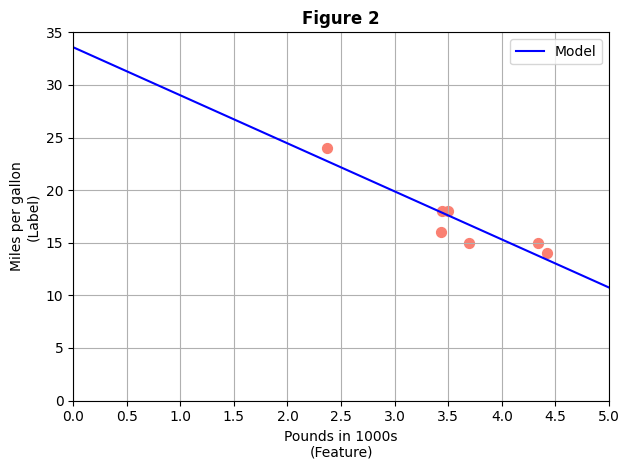

In [8]:
plt.clf()

feature = [3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37]
label = [18, 15, 18, 16, 15, 14, 24]

plt.scatter(feature, label, color="salmon", s=50)

slope, intercept = np.polyfit(feature, label, 1)

x_fit = np.linspace(0.0, 5.0, 100)
y_fit = slope * x_fit + intercept

plt.plot(x_fit, y_fit, color="blue", linestyle="-", label="Model")

plt.title("Figure 2", fontweight="bold")
plt.xlabel("Pounds in 1000s\n(Feature)")
plt.ylabel("Miles per gallon\n(Label)")

plt.xticks([x / 10 for x in range(0, 55, 5)])
plt.yticks([y for y in range(0, 40, 5)])

plt.xlim((0, 5))
plt.ylim((0, 35))

plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Figure 2**. A best fit line drawn through the data from the previous figure.

### Linear regression equation

In algebraic terms, the model would be defined as $y=mx+b$, where

- $y$ is miles per gallon - the value we want to predict.
- $m$ is the slope of the line.
- $x$ is pounds - our input value.
- $b$ is the y-intercept.

In ML, we write the equation for a linear regression model as follows:

$$y^1=b+w_1x_1$$

where:

- $y^1$ is the predicted label - the output.
- $b$ is the bias of the model. Bias is the same concept as the y-intercept in the algebraic equation for a line. In ML, bias is sometimes referred to as $w_0$. Bias is a parameter of the model and is calculated during training.
- $w_1$ is the weight of the feature. Weight is the same concept as the slope $m$ in the algebraic equation for a line. Weight is a parameter of the model and is calculated during training.
- $x_1$ is a feature - the input.

During training, the model calculates the weight and bias that produce the best model.

---

- Prediction - $y^1$
- Calculated from training
  - Bias - $b$
  - Weight - $w_1$
- Feature value - $x_1$

Above is a mathematical representation of a linear model.

In our example, we'd calculate the weight and bias from the line we drew. The bias is $34$ (where the line intersects the y-axis), and the weight is $-4.6$ (the slope of the line). The model would be defined as $y^1=34+(-4.6)(x_1)$, and we could use it to make predictions. For instance, using this model, a 4,000-pound car would have a predicted fuel efficiency of 15.6 miles per gallon.

0.0 33.58512404269187


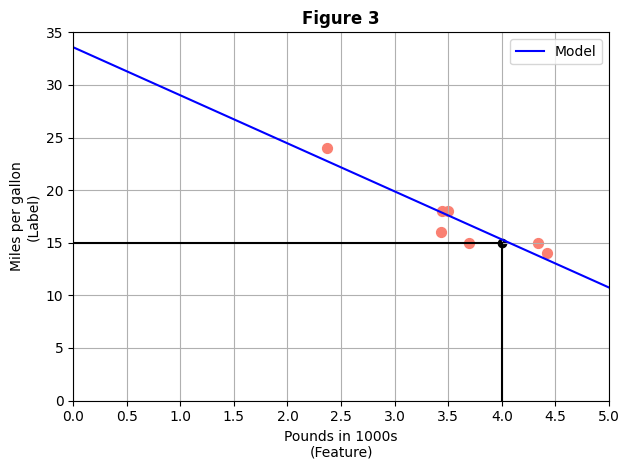

In [9]:
plt.clf()

feature = [3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37]
label = [18, 15, 18, 16, 15, 14, 24]

plt.scatter(feature, label, color="salmon", s=50)

slope, intercept = np.polyfit(feature, label, 1)

x_fit = np.linspace(0.0, 5.0, 100)
y_fit = slope * x_fit + intercept

plt.plot(x_fit, y_fit, color="blue", linestyle="-", label="Model")
plt.plot([0, 4], [15, 15], color="black")
plt.plot([4, 4], [0, 15], color="black")
plt.scatter(4, 15, color="black")

print(x_fit[0], y_fit[0])

plt.title("Figure 3", fontweight="bold")
plt.xlabel("Pounds in 1000s\n(Feature)")
plt.ylabel("Miles per gallon\n(Label)")

plt.xticks([x / 10 for x in range(0, 55, 5)])
plt.yticks([y for y in range(0, 40, 5)])

plt.xlim((0, 5))
plt.ylim((0, 35))

plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Figure 3**. Using the model, a 4,000-pound car has a predicted fuel efficiency of 15.6 miles per gallon.

### Models with multiple features

Although the example in this section uses only one feature - the heaviness of the car - a more sophisticated model migh rely on multiple features, each having a separate weight ($w_1$, $w_2$, etc.). For example, a model that relies on five features would be written like this:

$$y^1=b+w_1 x_1+w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5$$

In this example:

- $x_1$ could be pounds
- $x_2$, displacement
- $x_3$, acceleration
- $x_4$, number of cylinders
- $x_5$, horsepower

